In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [38]:
vstar=0.1;
l=0.027;
wx=.05
wy=1
c=-0.085
n=1

In [40]:
def vec_react_prime(u):
    out=np.zeros(u.shape)
    for j in range(0, len(u)):
        if u[j] > 0:
            out[j]=(1/u[j]**2)*np.exp(-1/u[j])
    return out


In [42]:
def react_prime(u):
    if u > 0:
        out=(1/u**2)*np.exp(-1/u)
    else: out=0
    return out

In [44]:
react_prime(u2)

0.10794085436311748

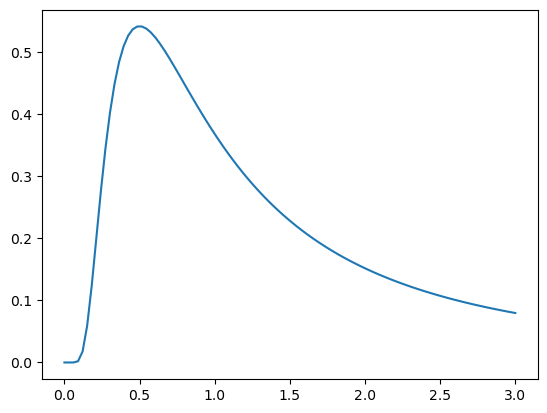

In [46]:
u_range=np.linspace(0,3,100)
plt.plot(u_range, vec_react_prime(u_range))
plt.show()

In [48]:
u0=0;
u2=2.49;

In [50]:
def real_part(k,n,ustar):
    return -k**2-n**2+vstar*react_prime(ustar)-l

In [52]:
def imag_part(k,n):
    return (c-wx)*k-wy*n

In [60]:
k_range=np.linspace(-3,3,100)
n_range=[-2,-1,0,1,2]

In [96]:
num_levels = 4
colors = plt.cm.seismic(np.linspace(.2, .9, num_levels +1 ))
#colors[num_levels // 2] = [1, 1, 1, 1] # set to white
#colors[num_levels // 2 + 1] = [1, 1, 1, 1]

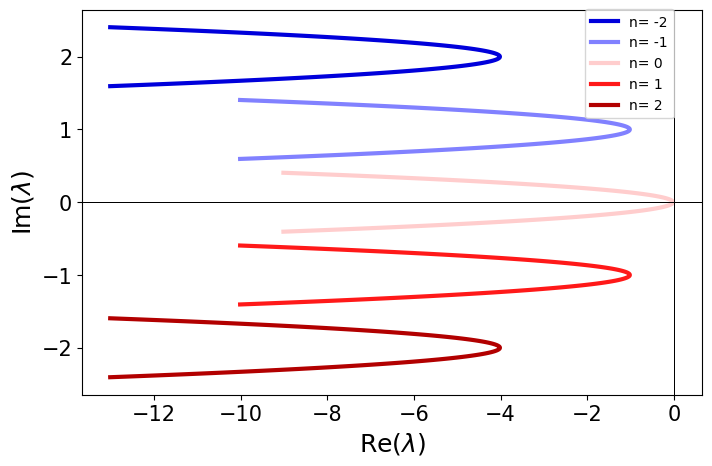

In [98]:
num_vals=len(n_range)
#colors=plt.cm.plasma(np.linspace(0.2,.8,num_vals)) 
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlabel(r"$\text{Re}(\lambda)$", fontsize=18)
ax.set_ylabel(r"$\text{Im}(\lambda)$",fontsize=18)
ax.tick_params(axis="both", which="major", labelsize=15)


for index,n in enumerate(n_range):
    plt.plot(real_part(k_range,n,u2), imag_part(k_range,n), label=("n= "+str(n)), color=colors[index], linewidth=3)
    plt.axvline(x=0, color="black", linewidth=.5)
    plt.axhline(y=0, color="black",linewidth=.5)
    plt.legend(loc="upper right")
    ax.legend(bbox_to_anchor=(.8, .7))
    #plt.xlim(-1,0)
plt.savefig("essential_spectrum.pdf", format="pdf",bbox_inches='tight')
plt.show()